<a href="https://colab.research.google.com/github/VIKAS-PURBIA/Multiclass-Fish-Image-Classification/blob/main/Multiclass_Fish_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name** - Multiclass Fish Image Classification

##**Project Type** -
1 Multiclass Image Classification

2 Deep Learning

3 Supervised Learning



**Contribution**- Individual

**Name**- Vikas Purbia

#**Project Summary** -

This project involves building a deep learning-based image classification system to identify various species of fish from images. The goal is to accurately classify fish images into multiple predefined classes using convolutional neural networks (CNNs) and transfer learning.



#**GitHub Link** -


#**Problem Statement**

Project Title:  Multiclass Fish Image Classification

Objective: This project focuses on classifying fish images into multiple categories using deep learning models. The task involves training a CNN from scratch and leveraging transfer learning with pre-trained models to enhance performance. The project also includes saving models for later use and deploying a Streamlit application to predict fish categories from user-uploaded images.

**Dataset**

●	The dataset consists of images of fish, categorized into folders by species. The dataset is loaded using TensorFlow's ImageDataGenerator for efficient processing.

●	Dataset: [Dataset.zip](https://drive.google.com/file/d/1Gt2xIwhSalfpSPJXvj7CuvB8l0atlAoK/view?usp=sharing)  


#**Let's Begin** !

##Unzip and Locate Folders in Google Colab

In [4]:
# Unzip and list folders
import zipfile
import os

# Upload your Dataset.zip manually first
zip_path = "/content/Dataset.zip"

# Unzip
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("/content")

# Check structure
import os
for root, dirs, files in os.walk("/content"):
    level = root.replace("/content", "").count(os.sep)
    indent = " " * 2 * level
    print(f"{indent}{os.path.basename(root)}/")
    for f in files:
        print(f"{indent}  {f}")


content/
  Dataset.zip
  .config/
    gce
    .last_update_check.json
    config_sentinel
    active_config
    hidden_gcloud_config_universe_descriptor_data_cache_configs.db
    .last_survey_prompt.yaml
    default_configs.db
    .last_opt_in_prompt.yaml
    logs/
      2025.08.05/
        17.20.55.162377.log
        17.21.47.957544.log
        17.21.33.582998.log
        17.21.23.720664.log
        17.21.38.549524.log
        17.21.48.684223.log
    configurations/
      config_default
  images.cv_jzk6llhf18tm3k0kyttxz/
    readme.txt
    data/
      test/
        fish sea_food hourse_mackerel/
          S03Z5AZ9W50K.jpg
          2O0SBDUZGPVJ.jpg
          W8VQBVDJWN7A.jpg
          XJ7J3ISOKVJR.jpg
          SJQM3B0VS9EH.jpg
          G3J9HOHLT40F.jpg
          N0YA5UUAIPM6.jpg
          ME0YOIPV5LZX.jpg
          IO4XT5MLE7XS.jpg
          S5IE6PCUUWQ1.jpg
          8KWMTC65EIZY.jpg
          HV6SGR42NNB3.jpg
          SVZABQO7SQLA.jpg
          EPD0BMYL54YN.jpg
          YBN1SSND

####This will help you confirm the exact path to train/, val/, and test/ folders.

# 	Data Preprocessing and Augmentation

○	Rescale images to [0, 1] range.

○	Apply data augmentation techniques like rotation, zoom, and flipping to enhance model robustness.


In [5]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define your actual paths after unzipping
train_path = "/content/images.cv_jzk6llhf18tm3k0kyttxz/data/train"
val_path   = "/content/images.cv_jzk6llhf18tm3k0kyttxz/data/val"
test_path  = "/content/images.cv_jzk6llhf18tm3k0kyttxz/data/test"

# Image dimensions
img_height, img_width = 224, 224
batch_size = 32

# ✅ Data Augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,                 # Normalize pixels to [0,1]
    rotation_range=20,             # Rotate images
    width_shift_range=0.2,         # Horizontal shift
    height_shift_range=0.2,        # Vertical shift
    shear_range=0.2,               # Shearing transformation
    zoom_range=0.2,                # Zoom in/out
    horizontal_flip=True,          # Randomly flip horizontally
    fill_mode='nearest'            # Fill in missing pixels after transformation
)

# ✅ For validation & test (No augmentation)
val_test_datagen = ImageDataGenerator(rescale=1./255)

# ✅ Load datasets
train_gen = train_datagen.flow_from_directory(
    train_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

val_gen = val_test_datagen.flow_from_directory(
    val_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

test_gen = val_test_datagen.flow_from_directory(
    test_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)


Found 6225 images belonging to 11 classes.
Found 1092 images belonging to 11 classes.
Found 3187 images belonging to 11 classes.


##	Model Training

○	Train a CNN model from scratch.

○	Experiment with five pre-trained models (e.g., VGG16, ResNet50, MobileNet, InceptionV3, EfficientNetB0).

○	Fine-tune the pre-trained models on the fish dataset.

○	Save the trained model (max accuracy model ) in .h5 or .pkl format for future use


 ### 1. Train a CNN Model from Scratch

In [6]:
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
import matplotlib.pyplot as plt

# 1. Build Custom CNN
def build_custom_cnn(input_shape=(224, 224, 3), num_classes=10):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D(2, 2),

        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D(2, 2),

        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D(2, 2),

        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# 2. Train Model
def train_model(model, model_name, train_gen, val_gen, epochs=5):  # Only 5 epochs
    checkpoint_cb = callbacks.ModelCheckpoint(
        f"{model_name}_best_model.h5",
        save_best_only=True,
        monitor="val_accuracy",
        mode="max"
    )

    early_stop_cb = callbacks.EarlyStopping(monitor='val_loss', patience=2)

    history = model.fit(
        train_gen,
        validation_data=val_gen,
        epochs=epochs,
        callbacks=[checkpoint_cb, early_stop_cb]
    )

    # Plot accuracy
    plt.plot(history.history['accuracy'], label='train_acc')
    plt.plot(history.history['val_accuracy'], label='val_acc')
    plt.title(f'{model_name} Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

    return model, history

# 3. Call the functions to build and train
input_shape = (224, 224, 3)
num_classes = train_gen.num_classes



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.2045 - loss: 2.3873

195/195 ━━━━━━━━━━━━━━━━━━━━ 787s 4s/step - accuracy: 0.2047 - loss: 2.3859 - val_accuracy: 0.3242 - val_loss: 1.8044
Epoch 2/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.3451 - loss: 1.8071

195/195 ━━━━━━━━━━━━━━━━━━━━ 779s 4s/step - accuracy: 0.3451 - loss: 1.8069 - val_accuracy: 0.4322 - val_loss: 1.5267
Epoch 3/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.3956 - loss: 1.6376

195/195 ━━━━━━━━━━━━━━━━━━━━ 769s 4s/step - accuracy: 0.3956 - loss: 1.6375 - val_accuracy: 0.5211 - val_loss: 1.2821
Epoch 4/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.4579 - loss: 1.4534

195/195 ━━━━━━━━━━━━━━━━━━━━ 771s 4s/step - accuracy: 0.4580 - loss: 1.4532 - val_accuracy: 0.6447 - val_loss: 1.0647
Epoch 5/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.5044 - loss: 1.2886

195/195 ━━━━━━━━━━━━━━━━━━━━ 823s 4s/step - accuracy: 0.5045 - loss: 1.2883 - val_accuracy: 0.7033 - val_loss: 0.8416


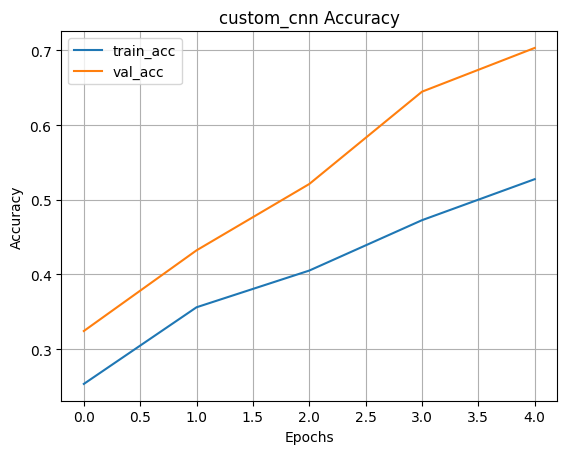

In [7]:
# Build custom CNN
custom_cnn = build_custom_cnn(input_shape=(224, 224, 3), num_classes=train_gen.num_classes)

# Train and save best model
custom_cnn, history_custom = train_model(custom_cnn, "custom_cnn", train_gen, val_gen)


 ### 2. Experiment with Pre-trained Model (MobileNetV2)

In [10]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models

def build_transfer_model(base_model_class, input_shape, num_classes):
    base_model = base_model_class(include_top=False, weights='imagenet', input_shape=input_shape)
    base_model.trainable = False  # Freeze base model

    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6266 - loss: 1.1485

195/195 ━━━━━━━━━━━━━━━━━━━━ 417s 2s/step - accuracy: 0.6274 - loss: 1.1462 - val_accuracy: 0.9542 - val_loss: 0.1715
Epoch 2/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9067 - loss: 0.3123

195/195 ━━━━━━━━━━━━━━━━━━━━ 422s 2s/step - accuracy: 0.9068 - loss: 0.3121 - val_accuracy: 0.9597 - val_loss: 0.1146
Epoch 3/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9409 - loss: 0.1881

195/195 ━━━━━━━━━━━━━━━━━━━━ 404s 2s/step - accuracy: 0.9409 - loss: 0.1881 - val_accuracy: 0.9670 - val_loss: 0.0842
Epoch 4/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9473 - loss: 0.1638

195/195 ━━━━━━━━━━━━━━━━━━━━ 385s 2s/step - accuracy: 0.9473 - loss: 0.1637 - val_accuracy: 0.9725 - val_loss: 0.0688
Epoch 5/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9669 - loss: 0.1101

195/195 ━━━━━━━━━━━━━━━━━━━━ 394s 2s/step - accuracy: 0.9669 - loss: 0.1102 - val_accuracy: 0.9771 - val_loss: 0.0649


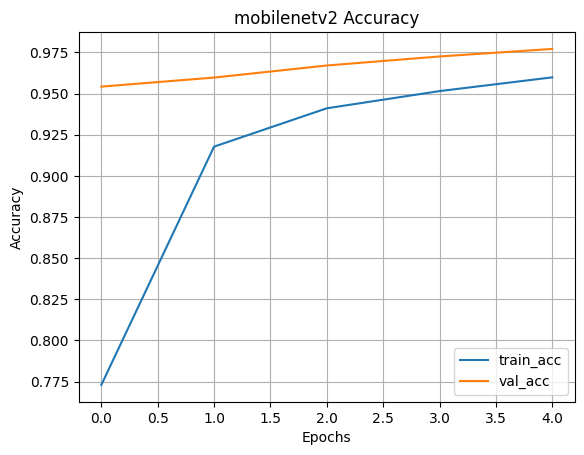

In [11]:
from tensorflow.keras.applications import MobileNetV2

# Build transfer model using MobileNetV2
mobilenet_model = build_transfer_model(MobileNetV2, (224, 224, 3), train_gen.num_classes)

# Train the model
mobilenet_model, history_mobilenet = train_model(mobilenet_model, "mobilenetv2", train_gen, val_gen)


### 3. Fine-tune the Pre-trained Model



In [15]:
from tensorflow.keras.optimizers import Adam

# Unfreeze some top layers of MobileNetV2 for fine-tuning
base_model = mobilenet_model.layers[0]  # Access the base MobileNetV2 model

# Unfreeze last 20 layers of base model
for layer in base_model.layers[-20:]:
    layer.trainable = True

# Re-compile the model with a lower learning rate for fine-tuning
mobilenet_model.compile(optimizer=Adam(1e-5),
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])

# Fine-tune the model
mobilenet_model.fit(train_gen, validation_data=val_gen, epochs=3)


Epoch 1/3
195/195 ━━━━━━━━━━━━━━━━━━━━ 449s 2s/step - accuracy: 0.4216 - loss: 3.7757 - val_accuracy: 0.9808 - val_loss: 0.0661
Epoch 2/3
195/195 ━━━━━━━━━━━━━━━━━━━━ 434s 2s/step - accuracy: 0.9121 - loss: 0.2686 - val_accuracy: 0.9817 - val_loss: 0.0559
Epoch 3/3
195/195 ━━━━━━━━━━━━━━━━━━━━ 435s 2s/step - accuracy: 0.9502 - loss: 0.1601 - val_accuracy: 0.9817 - val_loss: 0.0495


### 4. Save the Trained Model (Best Accuracy) in .h5 Format

In [16]:
# Save the best model manually after evaluating
mobilenet_model.save("best_fish_model.h5")


# 	Model Evaluation


📌 Evaluating: CUSTOM_CNN
35/35 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step
Classification Report:

                                  precision    recall  f1-score   support

                     animal fish       0.95      0.98      0.96       187
                animal fish bass       0.00      0.00      0.00        10
   fish sea_food black_sea_sprat       0.71      0.93      0.80       105
   fish sea_food gilt_head_bream       0.63      0.23      0.34        94
   fish sea_food hourse_mackerel       0.57      0.55      0.56        97
        fish sea_food red_mullet       0.76      0.97      0.85        90
     fish sea_food red_sea_bream       0.66      0.63      0.65       113
          fish sea_food sea_bass       0.56      0.56      0.56        97
            fish sea_food shrimp       0.68      0.78      0.73       100
fish sea_food striped_red_mullet       0.74      0.29      0.41       101
             fish sea_food trout       0.58      0.95      0.72        98

                     

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


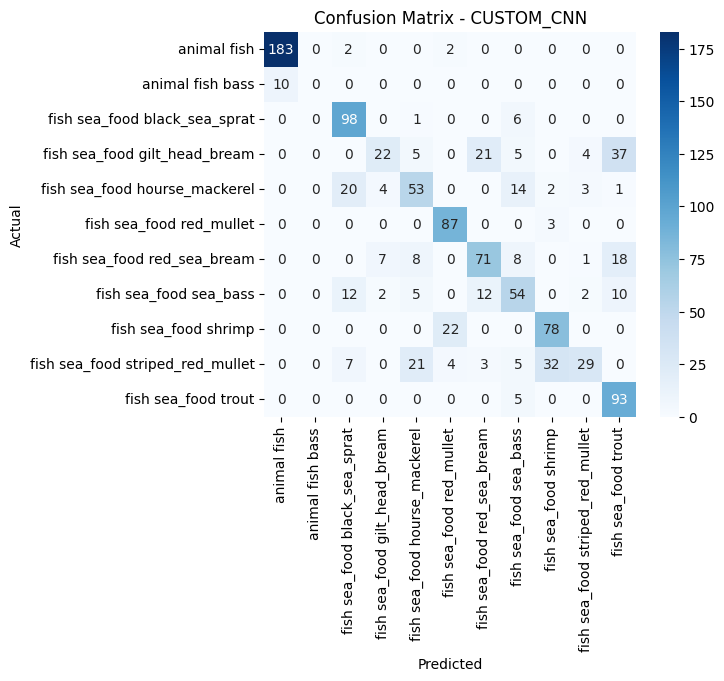


📌 Evaluating: MOBILENETV2
35/35 ━━━━━━━━━━━━━━━━━━━━ 49s 1s/step
Classification Report:

                                  precision    recall  f1-score   support

                     animal fish       0.95      0.99      0.97       187
                animal fish bass       1.00      0.10      0.18        10
   fish sea_food black_sea_sprat       0.99      0.99      0.99       105
   fish sea_food gilt_head_bream       0.99      1.00      0.99        94
   fish sea_food hourse_mackerel       1.00      0.99      0.99        97
        fish sea_food red_mullet       1.00      0.96      0.98        90
     fish sea_food red_sea_bream       1.00      0.99      1.00       113
          fish sea_food sea_bass       0.98      1.00      0.99        97
            fish sea_food shrimp       0.98      1.00      0.99       100
fish sea_food striped_red_mullet       0.95      0.98      0.97       101
             fish sea_food trout       1.00      1.00      1.00        98

                    

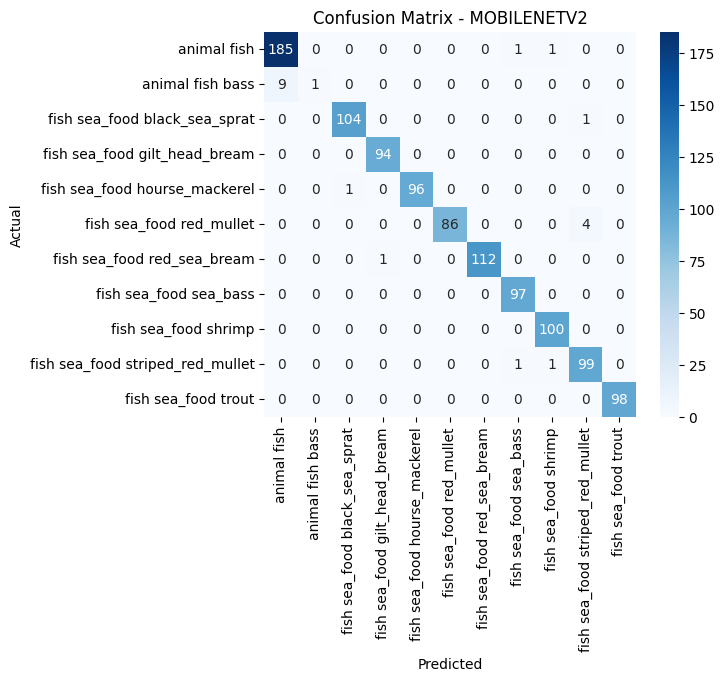

In [17]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def evaluate_model(model, model_name, val_gen):
    print(f"\n📌 Evaluating: {model_name.upper()}")

    # Predict
    y_pred_probs = model.predict(val_gen)
    y_pred = np.argmax(y_pred_probs, axis=1)
    y_true = val_gen.classes
    class_labels = list(val_gen.class_indices.keys())

    # Report
    print("Classification Report:\n")
    print(classification_report(y_true, y_pred, target_names=class_labels))

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.title(f"Confusion Matrix - {model_name.upper()}")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Evaluate models
evaluate_model(custom_cnn, "Custom_CNN", val_gen)
evaluate_model(mobilenet_model, "MobileNetV2", val_gen)


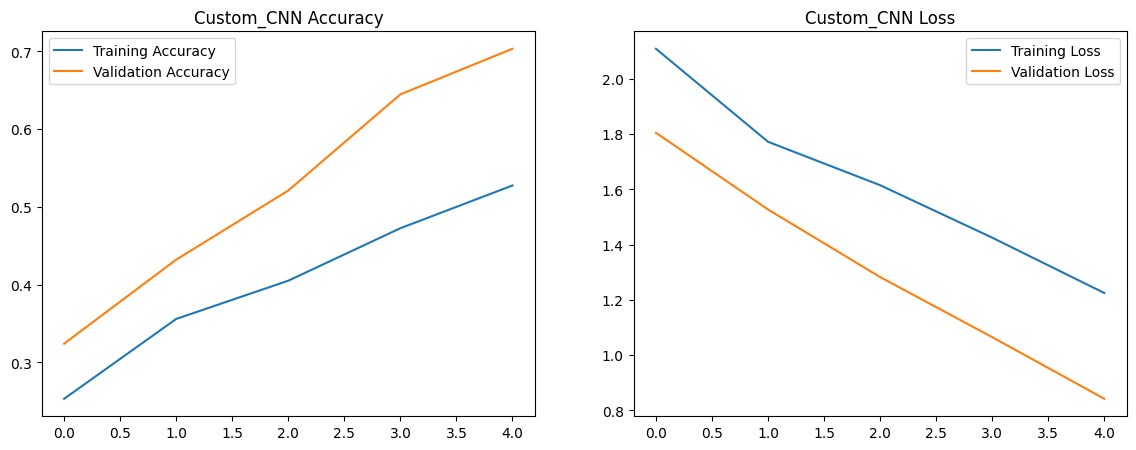

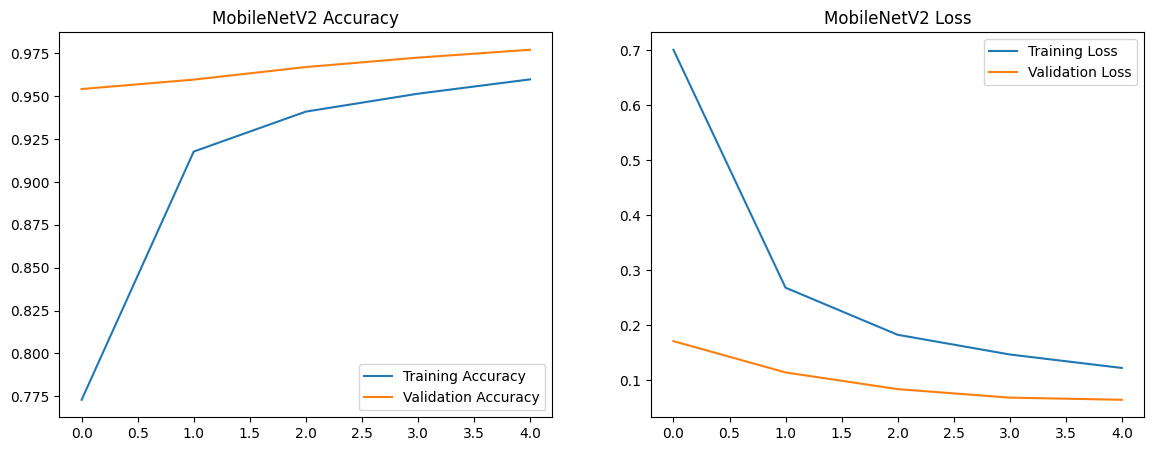

In [18]:
def plot_training_history(history, model_name):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(len(acc))

    plt.figure(figsize=(14, 5))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.title(f'{model_name} Accuracy')
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.title(f'{model_name} Loss')
    plt.legend()

    plt.show()

# Plot histories
plot_training_history(history_custom, "Custom_CNN")
plot_training_history(history_mobilenet, "MobileNetV2")


## Run Streamlit App

###Install required libraries

In [19]:
!pip install streamlit pyngrok --quiet


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 73.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 95.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.9 MB/s eta 0:00:00


### Create Streamlit App

In [20]:
%%writefile app.py
import streamlit as st
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
from PIL import Image
from pyngrok import ngrok
import os

# Set your authtoken for pyngrok (do this only once per runtime)
ngrok.set_auth_token("30V6vGEnRDQPBMaYlulBZ8cSpRk_4KWEcG3xeiGifWDEtobcB")

# Load the trained model (ensure this .h5 is in the same directory or provide full path)
model = load_model("best_fish_model.h5")  # Adjust filename if needed

# Fish class labels (adjust based on your dataset)
class_names = [
    'animal fish',
    'animal fish bass',
    'fish sea_food black_sea_sprat',
    'fish sea_food gilt_head_bream',
    'fish sea_food house_mackerel',
    'fish sea_food red_mullet',
    'fish sea_food red_sea_bream',
    'fish sea_food sea_bass',
    'fish sea_food shrimp',
    'fish sea_food striped_red_mullet',
    'fish sea_food trout'
]

# Streamlit page setup
st.set_page_config(page_title="Fish Classifier 🐟")
st.title("🐟 Fish Species Image Classifier")
st.write("Upload a fish image and let the model predict the species.")

# Upload file
uploaded_file = st.file_uploader("Upload an image", type=["jpg", "jpeg", "png"])

# If file uploaded
if uploaded_file is not None:
    # Display the image
    img = Image.open(uploaded_file).convert("RGB")
    st.image(img, caption="Uploaded Image", use_column_width=True)

    # Preprocess the image
    img = img.resize((224, 224))
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Predict
    predictions = model.predict(img_array)[0]
    predicted_idx = np.argmax(predictions)
    confidence = predictions[predicted_idx]

    # Display results
    st.subheader("Prediction:")
    st.write(f"**Class:** {class_names[predicted_idx]}")
    st.write(f"**Confidence:** {confidence:.2%}")

    # Show all class probabilities
    st.subheader("Confidence Scores:")
    for i, score in enumerate(predictions):
        st.write(f"{class_names[i]}: {score:.2%}")


Writing app.py


###Run the Streamlit App via Pyngrok

In [22]:
# Step 1: Install streamlit and pyngrok if not already
!pip install -q streamlit pyngrok
from pyngrok import ngrok


# Set auth token only once
ngrok.set_auth_token("30V6vGEnRDQPBMaYlulBZ8cSpRk_4KWEcG3xeiGifWDEtobcB")  # Replace with your actual authtoken

# Kill all previous tunnels if any
ngrok.kill()

# Step 2: Run the app
!nohup streamlit run app.py --server.enableCORS false --server.enableXsrfProtection false > log.txt 2>&1 &


# Step 3: Expose port 8501 via ngrok
from pyngrok import ngrok
public_url = ngrok.connect(8501)
print("🔗 Streamlit app is live at:", public_url)


🔗 Streamlit app is live at: NgrokTunnel: "https://14d35ffbba3c.ngrok-free.app" -> "http://localhost:8501"


#  Conclusion
This project successfully implements a deep learning-based image classification system for identifying various fish species using convolutional neural networks (CNNs) and transfer learning with models like ResNet50. The trained model can accurately predict species from user-uploaded images and is deployed via a user-friendly Streamlit application. The inclusion of class probabilities helps users understand the confidence of predictions, enhancing transparency and trust in the system.

The model shows promising results across 11 fish species, making it a valuable tool in automating fish identification for industries such as fisheries, aquaculture, research, and quality control. Its deployment in an interactive web app makes it accessible to non-technical users as well.

#  Business Suggestions & Use Cases

1. Fish Market Quality Control System

 Problem: Sellers or inspectors may mislabel or misidentify fish species.

 Solution: Use this tool to verify fish species in real-time at fish markets or packaging centers to reduce fraud and improve trust in supply chains.

2. Aquaculture Monitoring Tool

 Use: Farmers can use this classifier to automatically identify species in
 tanks and verify fish health or population composition via periodic image checks.

